# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *
from tools_routing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Load files

LAM output analysis, routing files.

Simu irr et simu no-irr.

## Sims

In [18]:
# noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/noirr_2010_2022'
# irr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/irr_2010_2022'
noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/noirr'
irr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/irr'

In [19]:
rename_dict = {
        'time_counter' : 'time',
        'routing_stream_reservoir_r' : 'streamr',
        'routing_fast_reservoir_r' : 'fastr',
        'routing_slow_reservoir_r' : 'slowr',
        'routing_drainage_r' : 'drainage',
        'routing_runoff_r' : 'runoff',
        'routing_hydrographs_r' : 'hydrographs',
        'routing_irrigation_r' : 'irrigation',
        'irrig_netereq_r' : 'netirrig'
        # 'routing_riverflow_r' : 'riverflow',
        # 'routing_coastalflow_r' : 'coastalflow'
        }

long_name_dict = {
        'streamr' : 'stream reservoir',
        'fastr' : 'fast reservoir',
        'slowr' : 'slow reservoir',
        'drainage' : 'drainage',
        'runoff' : 'runoff',
        'hydrographs' : 'hydrographs',
        'irrigation' : 'irrigation',
        'netirrig' : 'net irrigation'
        # 'riverflow' : 'river flow',
        # 'coastalflow' : 'coastal flow'
        }

In [81]:
# filename = '{}/SRF/MO/sim1*_hydrographs_monthly_*.nc'.format(noirr_dir)
filename = '{}/*/SRF/MO/*diag_routing_r.nc'.format(noirr_dir)
sim_noirr = xr.open_mfdataset(filename)

sim_noirr = sim_noirr.rename(rename_dict)
sim_noirr = sim_noirr.sel(lon=slice(lon_min, lon_max),lat=slice(lat_max, lat_min))


#add long name to variables
for var in sim_noirr.variables:
    if var in long_name_dict.keys():
        sim_noirr[var].attrs['long_name'] = long_name_dict[var]
from dateutil.relativedelta import relativedelta

#move data 1 month back
sim_noirr['time'] = sim_noirr['time'].copy(
    data=[(pd.Timestamp(t.item()) - relativedelta(months=1)).to_datetime64() for t in sim_noirr['time'].values]
)

#add unit m³/s to hydrographs
sim_noirr['hydrographs'].attrs['units'] = 'm³/s'

sim_noirr.attrs['name'] = 'noirr'
sim_noirr.attrs['plot_color'] = 'red'

sim_noirr

<xarray.Dataset>
Dimensions:              (lat: 480, lon: 840, basins: 200, time: 156,
                          axis_nbounds: 2)
Coordinates:
  * lat                  (lat) float32 43.99 43.97 43.96 ... 36.04 36.03 36.01
  * lon                  (lon) float32 -9.992 -9.975 -9.958 ... 3.975 3.992
  * basins               (basins) |S255 b'Amazon\x00                         ...
    time_instant         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                 (time) datetime64[ns] 2010-01-01 ... 2022-12-01
Dimensions without coordinates: axis_nbounds
Data variables: (12/13)
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    flow_r               (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    runoff               (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    drainage             (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    fastr                (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    ...                   ...
    streamr              (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    hydrographs          (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    netirrig             (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    irrigation           (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    basins_riverflow     (time, basins) float64 dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area  (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
Attributes:
    name:         noirr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:52:38 GMT
    uuid:         79bcbd35-667a-4675-8cc4-27b750cade0a
    plot_color:   red

In [82]:
filename = '{}/*/SRF/MO/*diag_routing_r.nc'.format(irr_dir)
sim_irr = xr.open_mfdataset(filename)

sim_irr = sim_irr.rename(rename_dict)
sim_irr = sim_irr.sel(lon=slice(lon_min, lon_max),lat=slice(lat_max, lat_min))

#add long name to variables
for var in sim_irr.variables:
    if var in long_name_dict.keys():
        sim_irr[var].attrs['long_name'] = long_name_dict[var]

#move data 1 month back
sim_irr['time'] = sim_irr['time'].copy(
    data=[(pd.Timestamp(t.item()) - relativedelta(months=1)).to_datetime64() for t in sim_irr['time'].values]
)

#add unit m³/s to hydrographs
sim_irr['hydrographs'].attrs['units'] = 'm³/s'

sim_irr.attrs['name']='irr'
sim_irr.attrs['plot_color'] = 'blue'

sim_irr

<xarray.Dataset>
Dimensions:              (lat: 480, lon: 840, basins: 200, time: 156,
                          axis_nbounds: 2)
Coordinates:
  * lat                  (lat) float32 43.99 43.97 43.96 ... 36.04 36.03 36.01
  * lon                  (lon) float32 -9.992 -9.975 -9.958 ... 3.975 3.992
  * basins               (basins) |S255 b'Amazon\x00                         ...
    time_instant         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                 (time) datetime64[ns] 2010-01-01 ... 2022-12-01
Dimensions without coordinates: axis_nbounds
Data variables: (12/13)
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    flow_r               (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    runoff               (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    drainage             (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    fastr                (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    ...                   ...
    streamr              (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    hydrographs          (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    netirrig             (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    irrigation           (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    basins_riverflow     (time, basins) float64 dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area  (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:54:51 GMT
    uuid:         308aaefd-83d8-48ed-9d6c-b3d74350cee0
    plot_color:   blue

## Obs

In [22]:
filename = '../../../obs/streamflow/GRDC-Monthly_Spain.nc'
obs = xr.open_dataset(filename)
obs

<xarray.Dataset>
Dimensions:              (time: 1347, id: 186)
Coordinates:
  * time                 (time) datetime64[ns] 1912-01-01 ... 2024-03-01
  * id                   (id) int32 6226100 6226200 6226210 ... 6228910 6228920
Data variables:
    runoff_mean          (time, id) float32 ...
    flag                 (time, id) float32 ...
    area                 (id) float32 ...
    country              (id) object ...
    geo_x                (id) float32 ...
    geo_y                (id) float32 ...
    geo_z                (id) float32 ...
    owneroforiginaldata  (id) object ...
    river_name           (id) object ...
    station_name         (id) object ...
    timezone             (id) float32 ...
Attributes:
    title:          Mean daily discharge (Q)
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Download from GRDC Database, 26/06/2024
    missing_value:  -999.000

In [23]:
#create a subdataset from obs with stations that are in dict stations_dict_filtered
obs_filtered = obs.sel(id=(list(stations_dict_filtered.keys())))
obs_filtered

<xarray.Dataset>
Dimensions:              (time: 1347, id: 16)
Coordinates:
  * time                 (time) datetime64[ns] 1912-01-01 ... 2024-03-01
  * id                   (id) int32 6212700 6217700 6217600 ... 6226400 6213800
Data variables:
    runoff_mean          (time, id) float32 ...
    flag                 (time, id) float32 ...
    area                 (id) float32 ...
    country              (id) object ...
    geo_x                (id) float32 ...
    geo_y                (id) float32 ...
    geo_z                (id) float32 ...
    owneroforiginaldata  (id) object ...
    river_name           (id) object ...
    station_name         (id) object ...
    timezone             (id) float32 ...
Attributes:
    title:          Mean daily discharge (Q)
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Download from GRDC Database, 26/06/2024
    missing_value:  -999.000

# River outlets and stations

format :     id: {'name':,  'river':, 'lon_grid':, 'lat_grid':, 'year_min':, 'year_max': },


In [24]:
river_coords_merit = {
        1:{'name':'Ebro','river':'Ebro', 'lon_grid': 0.86, 'lat_grid': 40.725, 'year_min':2010, 'year_max':2022 },
        2:{'name':'Minho','river':'Minho', 'lon_grid': -8.875, 'lat_grid': 41.86, 'year_min':2010, 'year_max':2022 },
        3:{'name':'Tajo','river':'Tajo', 'lon_grid': -9.175, 'lat_grid': 38.6875, 'year_min':2010, 'year_max':2022 },
        4:{'name':'Duero','river':'Duero', 'lon_grid': -8.675, 'lat_grid': 41.1375, 'year_min':2010, 'year_max':2022 },
        5:{'name':'Guadiana','river':'Guadiana', 'lon_grid': -7.39, 'lat_grid': 37.175, 'year_min':2010, 'year_max':2022 },
        6:{'name':'Guadalquivir','river':'Guadalquivir', 'lon_grid': -6.325, 'lat_grid': 36.91, 'year_min':2010, 'year_max':2022 }
}

In [25]:
stations_merit = {
    6298992: {'name': 'Albarreal De Tajo',  'river': 'Tajo', 'lon_grid':-4.17499303817749, 'lat_grid':39.891666412353516, 'year_min':2010, 'year_max':2021 },
    # 6298249: {'name': 'Zaragoza',  'river': 'Ebro', 'lon_grid':-0.8749926686286926, 'lat_grid':41.65833282470703, 'year_min':2010, 'year_max':2021},
    # 6298481: {'name': 'San Miguel del Pino', 'river': 'Duero', 'lon_grid':-4.92499303817749, 'lat_grid':41.508331298828125, 'year_min':2010, 'year_max':2021},
    6298259:{'name': 'Badajoz', 'river': 'Guadiana', 'lat_grid': 38.85833358764648, 'lon_grid': -7.008326530456543, 'last_record': '2013-09-15', 'year_min':2010, 'year_max':2021},
    6298564: {'name': 'Villanueva de Azoague', 'lon_grid':-5.641659736633301, 'lat_grid':41.974998474121094, 'year_min':2010, 'year_max':2010}
}

In [114]:
#keeping only data after 2010
proper_stations_dict = {
    6226400: {'name': 'Zaragoza', 'river': 'Ebro', 'lat_grid': 41.67499923706055, 'lon_grid': -0.9083260297775269, 'last_record': '1984-11-15', 'station_nb': 1},
    6212410: {'name': 'Tore', 'river': 'Douro', 'lat_grid': 41.508331298828125, 'lon_grid': -5.474992752075195, 'last_record': '1984-11-15', 'station_nb': 2},
    6213700: {'name': 'Talavera', 'river': 'Tagus', 'lat_grid': 39.95833206176758, 'lon_grid': -4.824993133544922, 'last_record': '2013-06-15', 'station_nb': 3},

    6226800: {'name': 'Tortosa', 'river': 'Ebro', 'lat_grid': 40.82500076293945, 'lon_grid': 0.5250073671340942, 'last_record': '2013-09-15', 'station_nb': 4},

    6212700: {'name': 'Peral De Arlanza', 'river': 'Arlanza', 'lat_grid': 42.07500076293945, 'lon_grid': -4.074992656707764, 'last_record': '1984-08-15', 'station_nb': 5},
    6217700: {'name': 'Pinos Puente', 'river': 'Frailes', 'lat_grid': 37.27499771118164, 'lon_grid': -3.758326292037964, 'last_record': '1984-08-15', 'station_nb': 6},
    6226300: {'name': 'Castejon', 'river': 'Ebro', 'lat_grid': 42.17499923706055, 'lon_grid': -1.691659450531006, 'last_record': '2013-09-15', 'station_nb': 7},
    6216800: {'name': 'Quintanar', 'river': 'Giguela', 'lat_grid': 39.64166641235352, 'lon_grid': -3.0749928951263428, 'last_record': '2012-09-15', 'station_nb': 8},
    6226650: {'name': 'Fraga', 'river': 'Cinca', 'lat_grid': 41.52499771118164, 'lon_grid': 0.3416740298271179, 'last_record': '2013-09-15', 'station_nb': 9},
    6226600: {'name': 'Seros', 'river': 'Segre', 'lat_grid': 41.45833206176758, 'lon_grid': 0.4250073730945587, 'last_record': '2013-09-15', 'station_nb': 10},
    6213900: {'name': 'Peralejos', 'river': 'Tagus', 'lat_grid': 40.59166717529297, 'lon_grid': -1.9249927997589111, 'last_record': '2013-09-15', 'station_nb': 11},
    6213800: {'name': 'Trillo', 'river': 'Tagus', 'lat_grid': 40.70833206176758, 'lon_grid': -2.5749928951263428, 'last_record': '2013-09-15', 'station_nb': 12}
}

#keeping only 3 representative stations for 3 larger rivers, for simple figure
#keep only first 3 stations of proper_stations_dict
representative_stations_dict = dict(list(proper_stations_dict.items())[:3])

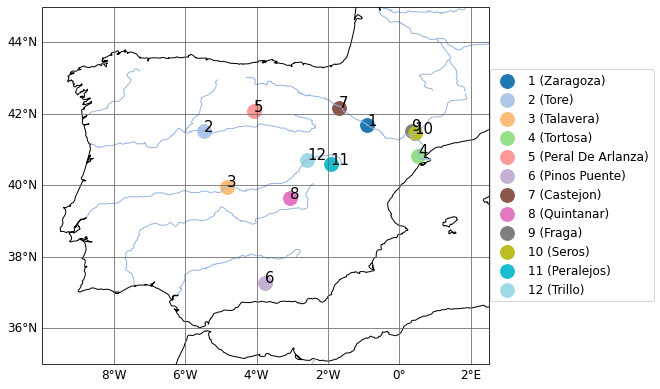

In [126]:
stations_map_dict(proper_stations_dict, title=None)

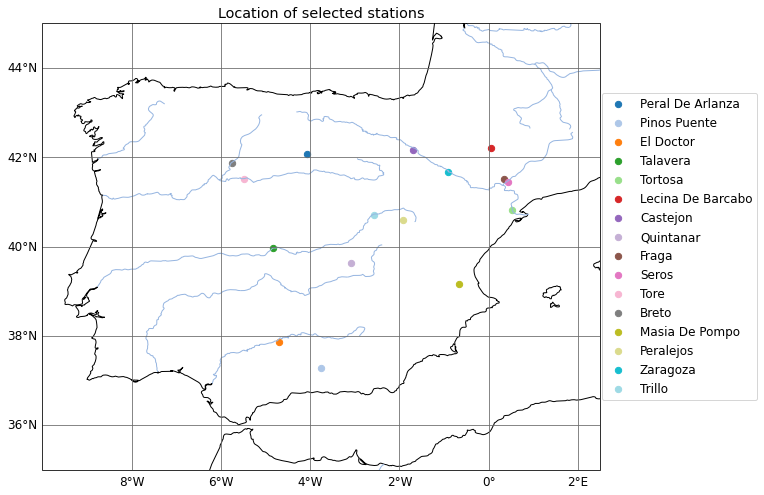

In [28]:
# plot station location on a map with rivers and coastlines
import cartopy
# Define 16 different colors using a colormap
cmap = plt.get_cmap('tab20')  # Or any other colormap you prefer
colors = [cmap(i) for i in np.linspace(0, 1, 16)]

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-10, 2.5, 35, 45])
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.ylocator = gl.ylocator = plt.MaxNLocator(5)
gl.right_labels = False
gl.top_labels = False
idx=0
for key, coordinates in stations_dict_filtered.items():
    plt.scatter(coordinates['lon_grid'], coordinates['lat_grid'], s=40, label=coordinates['name'], marker='o', color=colors[idx])
    idx+=1
plt.title('Location of selected stations')

#activate legend 
# plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.1)


# Maps

KeyError: 'units'

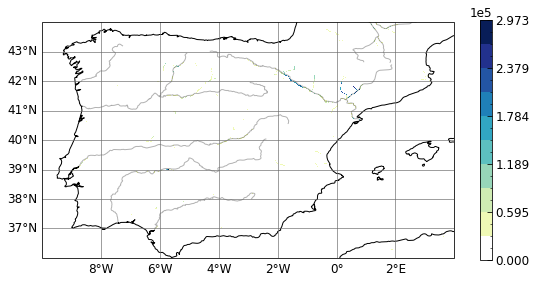

In [83]:
ds=sim_irr
var='irrigation'
map_ave(ds, var, cmap=wetW, hex=False)

No significance mask applied


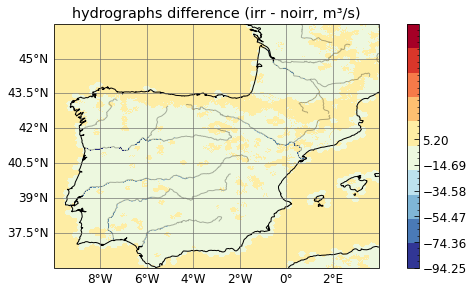

In [30]:
#diff
ds1=sim_irr
ds2=sim_noirr
var='hydrographs'
map_diff_ave(ds1, ds2, var)

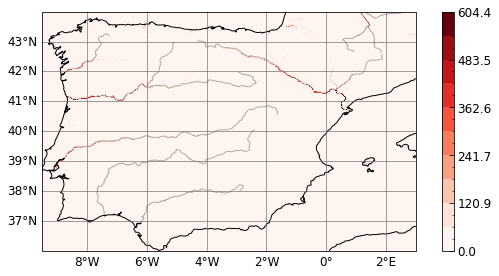

In [31]:
#Display map of var for ds on restricted area
var='hydrographs'
ds = sim_irr

subdomain = {
    'latmin': 36.75,
    'latmax': 37,
    'lonmin': -6.5,
    'lonmax': -6.25
}
subdomain = subdomain_spain

#restrict ds to latmin, latmax, lonmin, lonmax
ds=restrict_ds(ds, subdomain)
plotvar = ds[var].mean(dim='time')
map_plotvar(plotvar, cmap=reds)

# Time series

## Stations

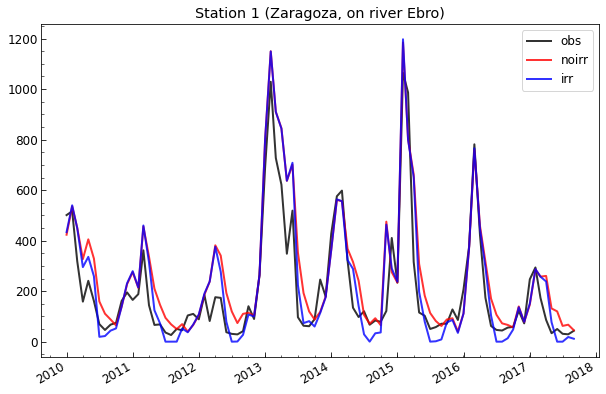

In [100]:
fig=plt.figure(figsize=(10, 6))
ax = plt.axes()
station_id=6226100
station_id, station_data=next(iter(proper_stations_dict.items()))
ds_list=[sim_noirr, sim_irr]
ts_station(obs, ax, station_id)
ts_with_obs(ds_list, obs, ax, station_id, station_data)

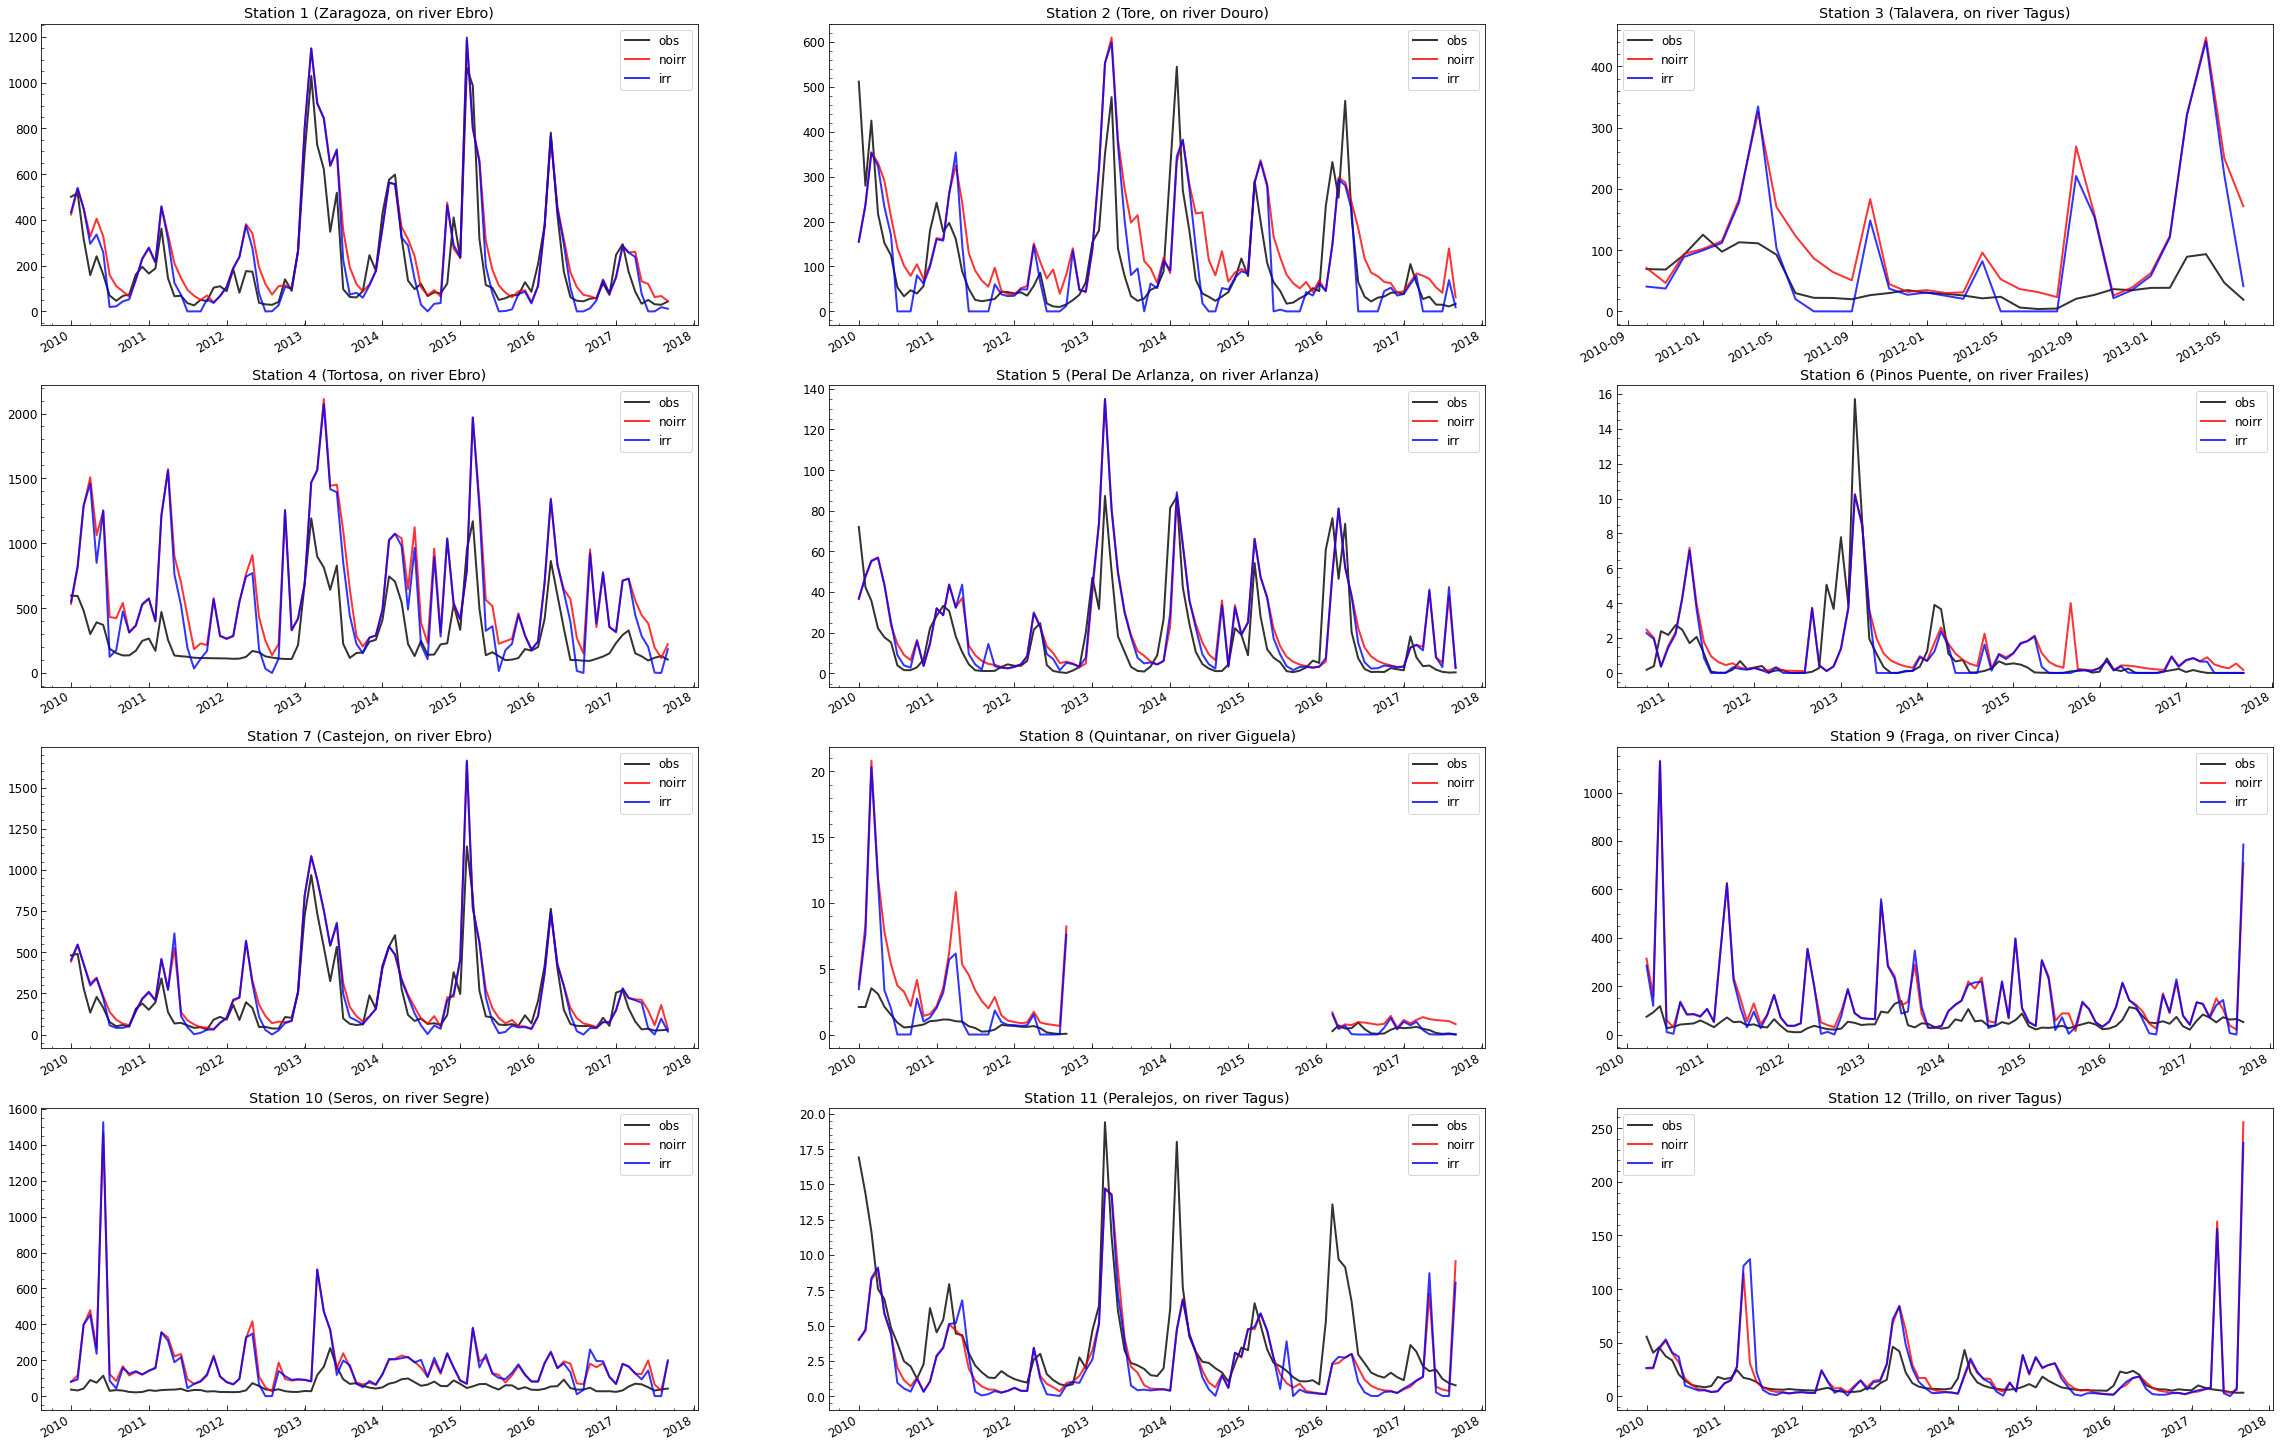

In [112]:
#plot a time series for each station from dict
fig, axes= plt.subplots(4,3, figsize=(40,25))
axes= axes.flatten()
ds_list=[sim_noirr, sim_irr]
for i, (station_id, station_data) in enumerate(proper_stations_dict.items()):
    ts_station(obs,axes[i], station_id, name=station_data['name'], year_min=2010, year_max=2022)
    ts_with_obs(ds_list, obs, axes[i], station_id, station_data, year_min=2010, year_max=2022)

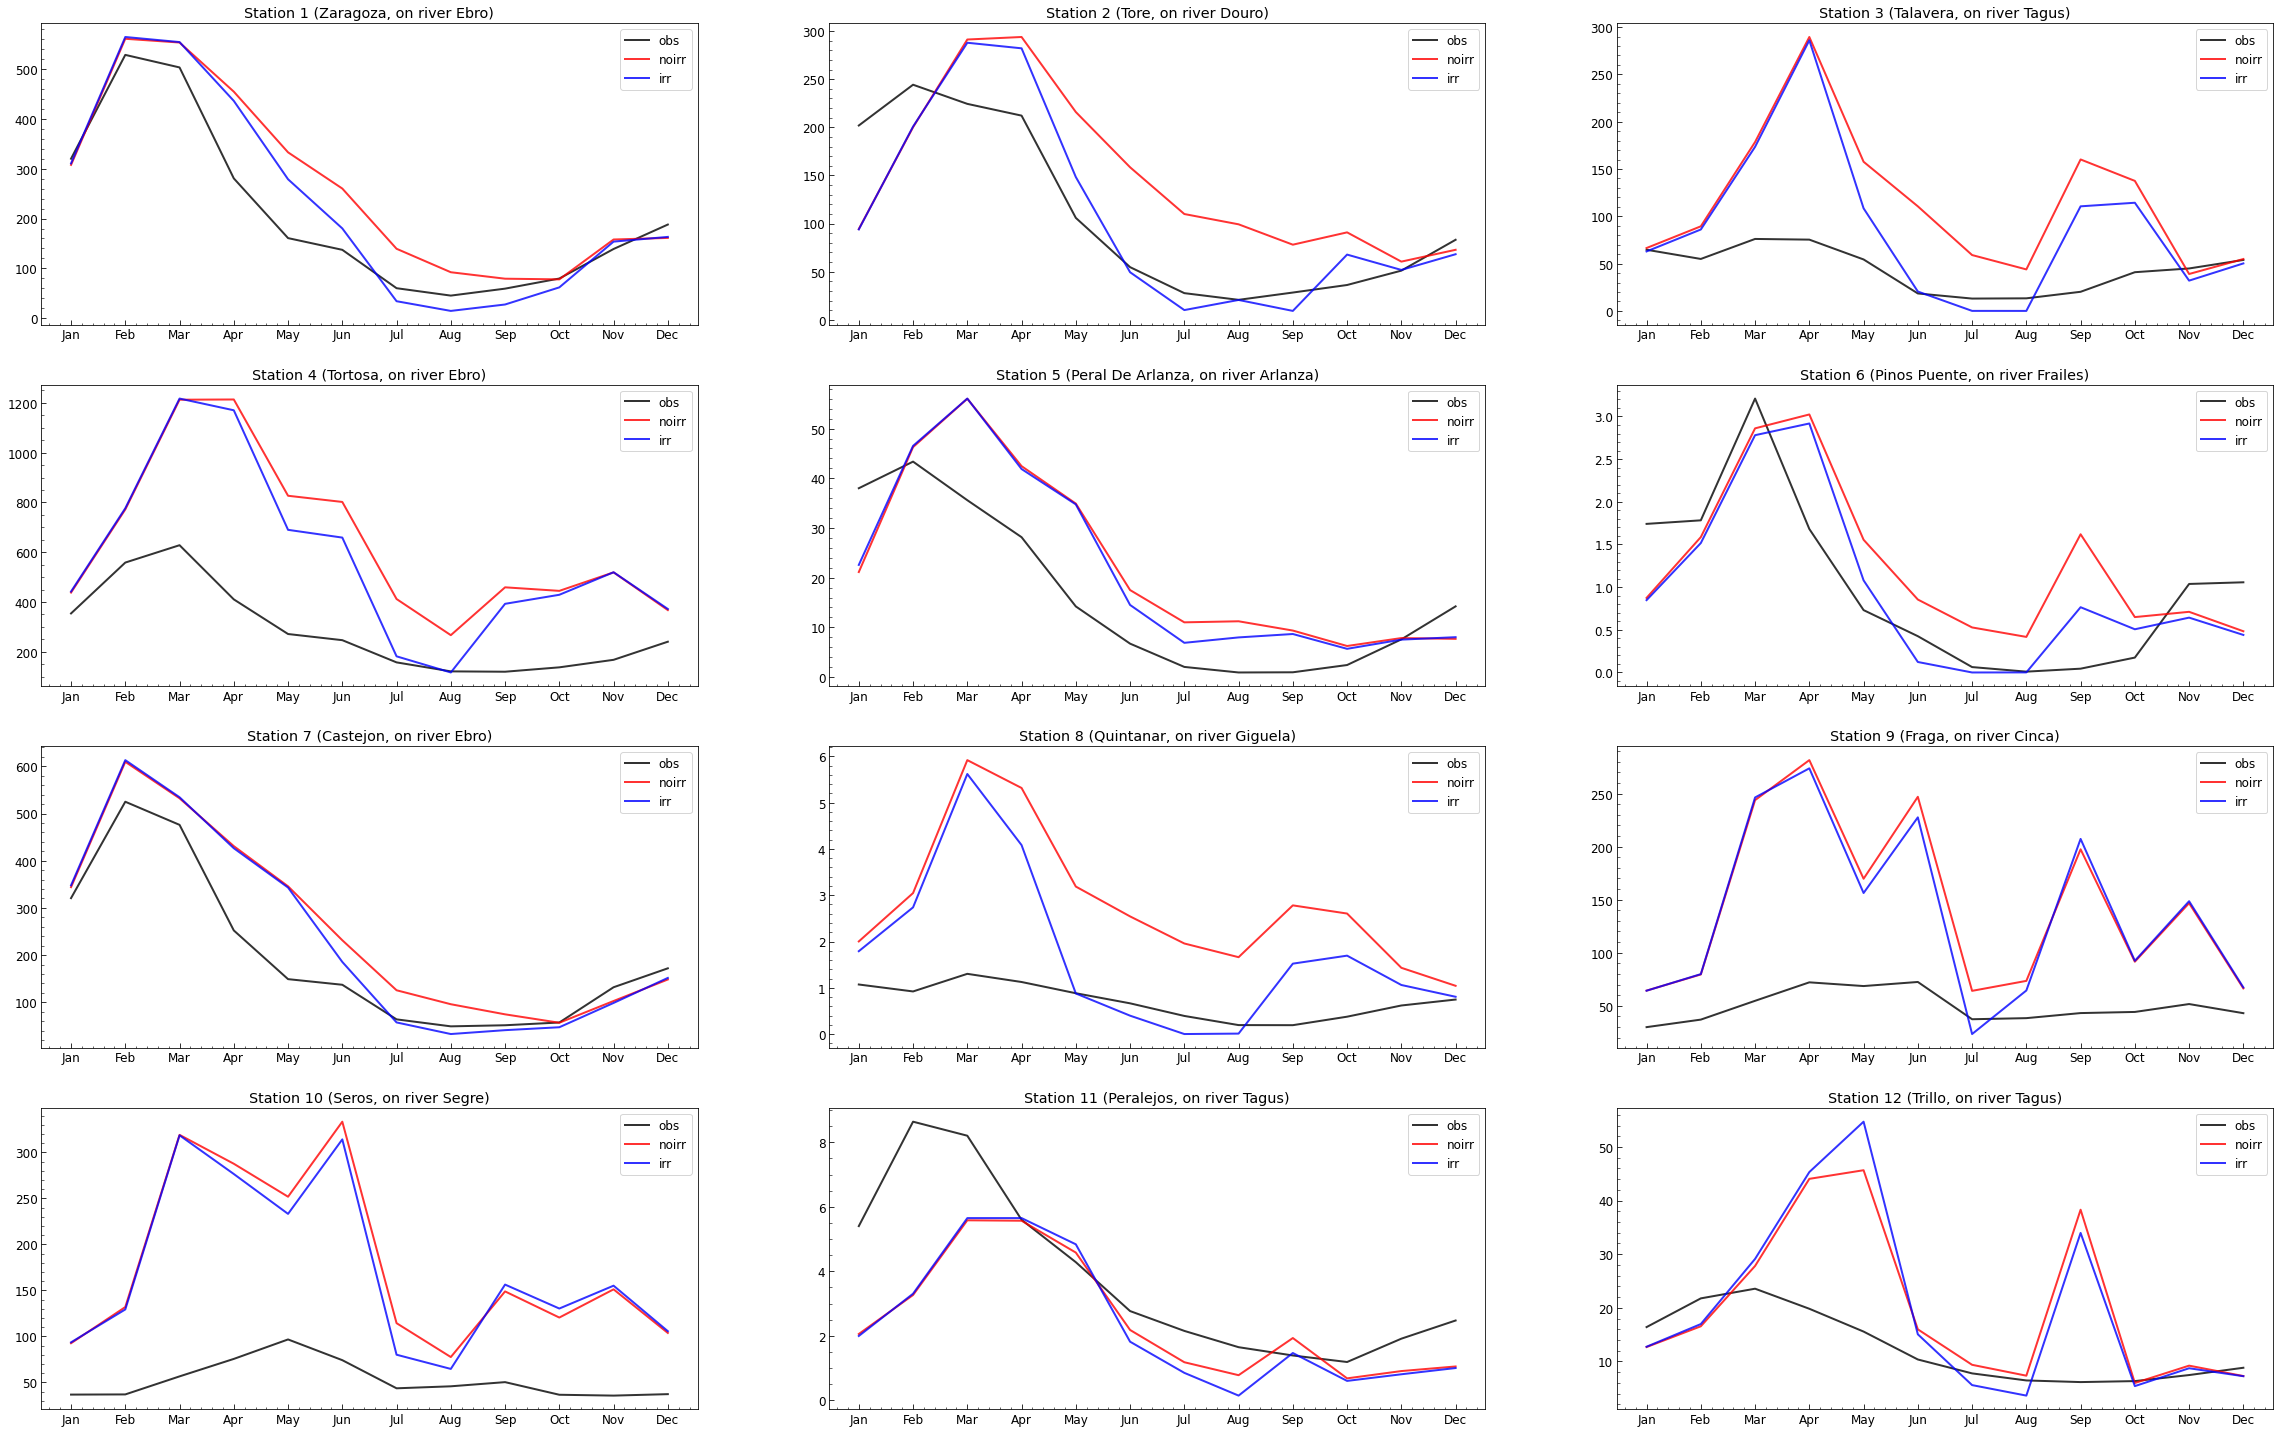

In [111]:
#plot a seasonnal cycle for each station from station_dict_filtered
fig, axes= plt.subplots(4,3, figsize=(40,25))
axes= axes.flatten()
ds_list=[sim_noirr, sim_irr]
for i, (station_id, station_data) in enumerate(proper_stations_dict.items()):
    sc_station(obs,axes[i], station_id, name=station_data['name'], year_min=2010, year_max=2022)
    sc_with_obs(ds_list, obs, axes[i], station_id, station_data, year_min=2010, year_max=2022)

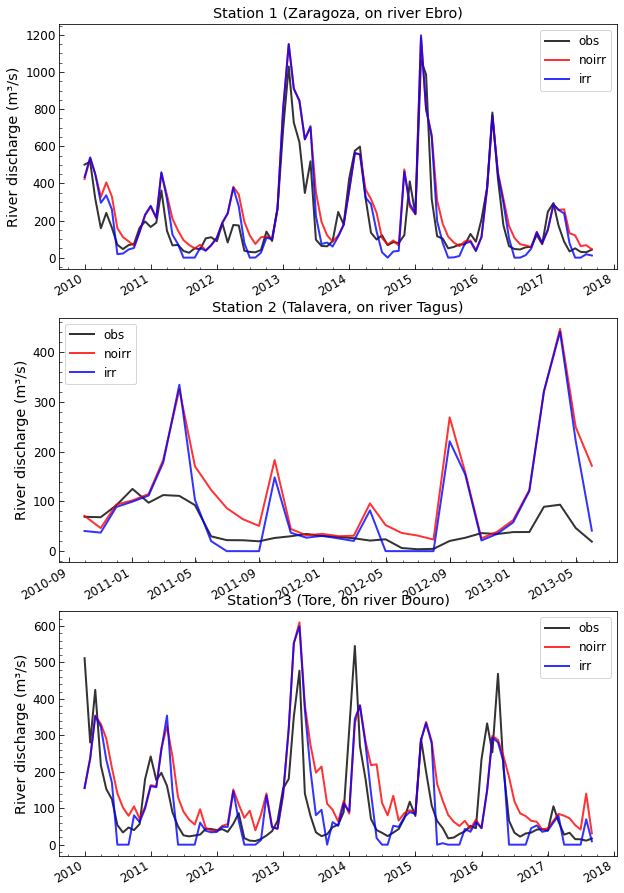

In [113]:
#plot a time series for each station from station_dict_filtered
fig, axes= plt.subplots(3,1, figsize=(10,15))
axes= axes.flatten()
ds_list=[sim_noirr, sim_irr]
for i, (station_id, station_data) in enumerate(representative_stations_dict.items()):
    ts_station(obs,axes[i], station_id, name=station_data['name'], ylabel='River discharge (m³/s)', year_min=2010, year_max=2022)
    ts_with_obs(ds_list, obs, axes[i], station_id, station_data, ylabel='River discharge (m³/s)', year_min=2010, year_max=2022)

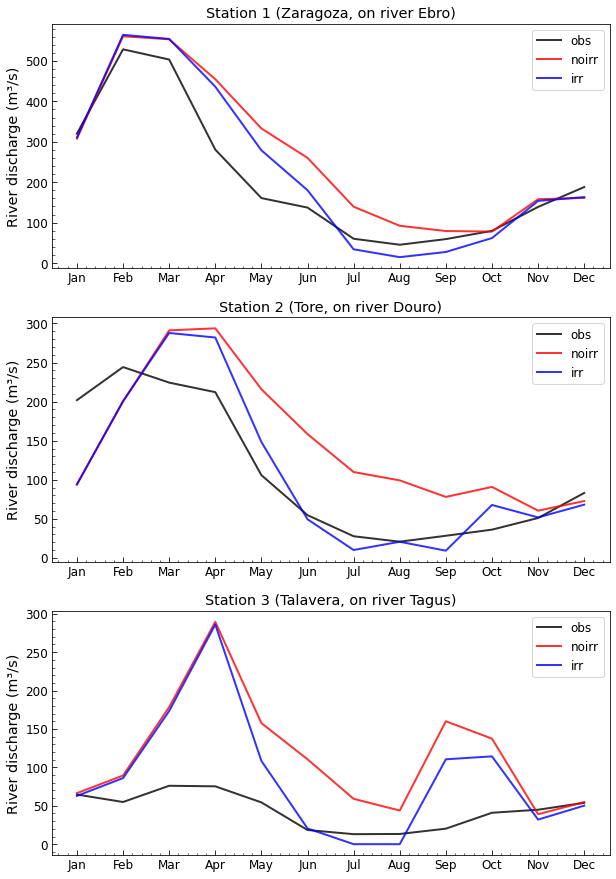

In [115]:
#plot a seasonnal cycle for each station from station_dict_filtered
fig, axes= plt.subplots(3, 1, figsize=(10,15))
axes= axes.flatten()
ds_list=[sim_noirr, sim_irr]
for i, (station_id, station_data) in enumerate(representative_stations_dict.items()):
    sc_station(obs,axes[i], station_id, name=station_data['name'], ylabel='River discharge (m³/s)', year_min=2010, year_max=2022)
    sc_with_obs(ds_list, obs, axes[i], station_id, station_data, ylabel='River discharge (m³/s)', year_min=2010, year_max=2022)

## Spatial averaging

In [ ]:
var='hydrographs'

ds1=sim_irr
# ds2=ORCirr
ds_list=[ds1, ds2]
ds_list=[ds1]

year_max=2015
time_series_ave(ds_list, var, year_max=year_max, title=None)
seasonal_cycle_ave(ds_list, var, title=None)

## En un point lon-lat (ou plusieurs avec dict)

In [ ]:
#Time series
var="hydrographs"
ds1=sim
ds_list=[ds1]
year_min=2010
year_max=2015
lon=-6.325
lat=36.91

time_series_lonlat(ds_list, var, lon, lat, year_min=year_min, year_max=year_max, title=None)

In [ ]:
ds_list=[sim]
discharge_coord_ts(ds_list, river_coords_merit, var='hydrographs', year_min=2010, year_max=2015)

In [ ]:
ds_list=[sim]
discharge_coord_sc(ds_list, river_coords_merit, var='hydrographs', year_min=2010, year_max=2015)

# Metrics

## Compute and display in table

In [131]:
station_id, station = next(iter(proper_stations_dict.items()))
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
for metric_to_use in metric_list:
    metric_value=compute_metric_station(sim_noirr, obs, station_id, station, metric_to_use)
    print('{} for station {} : {}'.format(metric_to_use.__short_name__, station['name'], metric_value))

Module (sim, m³/s) for station Zaragoza : 269.14
Module (obs, m³/s) for station Zaragoza : 210.88999938964844
Bias (m³/s) for station Zaragoza : 58.25
RMSE for station Zaragoza : 114.57
r for station Zaragoza : 0.92
NSE for station Zaragoza : 0.75
KGE for station Zaragoza : 0.7


In [151]:
# output a pandas dataframe with all metric values for a given list of metrics and stations
sim=sim_noirr
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
stations_dict=proper_stations_dict
# define dataframe with one row per station and one column per metric
df=[]
for station_id, station in stations_dict.items():
    label='Station {} ({})'.format(station['station_nb'],station['name'])
    df.append({'Station':label})
    for metric in metric_list:
        name=metric.__short_name__
        metric_value=compute_metric_station(sim, obs, station_id, station, metric)
        metric_value=np.round(metric_value, 2)
        # append metric_value to df
        df[-1][name]=metric_value

# convert df to pandas dataframe
df_noirr=pd.DataFrame(df)
# set Station as index
df_noirr.set_index('Station', inplace=True)
df_noirr['Bias (%)'] = np.round(df_noirr['Bias (m³/s)'] / df_noirr['Module (obs, m³/s)'], 3) * 100
#move Bias (%) to the 4th column
cols = df_noirr.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
df_noirr = df_noirr[cols]
#add average row
df_noirr.loc['Mean'] = df_noirr.mean()
df_noirr.drop('Module (sim, m³/s)', axis=1, inplace=False)

,"Module (obs, m³/s)",Bias (m³/s),Bias (%),RMSE,r,NSE,KGE
Station,,,,,,,
Station 1 (Zaragoza),210.889999,58.250000,27.600000,114.570,0.920000,0.750,0.70
Station 2 (Tore),109.180000,40.250000,36.900000,103.350,0.680000,0.290,0.51
Station 3 (Talavera),46.770000,71.290000,152.400000,115.120,0.500000,-10.170,-1.54
Station 4 (Tortosa),287.609985,363.310000,126.300000,486.320,0.690000,-2.710,-0.50
Station 5 (Peral De Arlanza),16.440001,6.690000,40.700000,17.950,0.740000,0.320,0.51
Station 6 (Pinos Puente),1.000000,0.270000,27.000000,1.610,0.710000,0.490,0.55
Station 7 (Castejon),201.339996,61.840000,30.700000,126.200,0.910000,0.680,0.63
Station 8 (Quintanar),0.710000,2.220000,312.700000,3.800,0.800000,-27.500,-4.14
Station 9 (Fraga),49.689999,95.990000,193.200000,180.910,0.430000,-47.800,-4.66


In [152]:
# output a pandas dataframe with all metric values for a given list of metrics and stations
sim=sim_irr
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
stations_dict=proper_stations_dict
# define dataframe with one row per station and one column per metric
df=[]
for station_id, station in stations_dict.items():
    label='Station {} ({})'.format(station['station_nb'],station['name'])
    df.append({'Station':label})
    for metric in metric_list:
        name=metric.__short_name__
        metric_value=compute_metric_station(sim, obs, station_id, station, metric)
        metric_value=np.round(metric_value, 2)
        # append metric_value to df
        df[-1][name]=metric_value

# convert df to pandas dataframe
df_irr=pd.DataFrame(df)
# set Station as index
df_irr.set_index('Station', inplace=True)
df_irr['Bias (%)'] = np.round(df_irr['Bias (m³/s)'] / df_irr['Module (obs, m³/s)'], 3) * 100
#move Bias (%) to the 4th column
cols = df_irr.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
df_irr = df_irr[cols]
#add average row
df_irr.loc['Mean'] = df_irr.mean()
df_irr.drop('Module (obs, m³/s)', axis=1, inplace=False).drop('Module (sim, m³/s)', axis=1, inplace=False)

,Bias (m³/s),Bias (%),RMSE,r,NSE,KGE
Station,,,,,,
Station 1 (Zaragoza),24.190000,11.500000,99.560000,0.930000,0.810000,0.80
Station 2 (Tore),-0.220000,-0.200000,86.570000,0.770000,0.500000,0.76
Station 3 (Talavera),44.820000,95.800000,102.640000,0.580000,-7.880000,-1.38
Station 4 (Tortosa),297.420000,103.400000,447.990000,0.720000,-2.150000,-0.37
Station 5 (Peral De Arlanza),5.780000,35.200000,17.390000,0.750000,0.360000,0.55
Station 6 (Pinos Puente),-0.030000,-3.000000,1.520000,0.740000,0.550000,0.67
Station 7 (Castejon),43.150000,21.400000,124.370000,0.920000,0.690000,0.66
Station 8 (Quintanar),1.060000,149.300000,3.120000,0.800000,-18.190000,-3.16
Station 9 (Fraga),89.320000,179.800000,184.180000,0.420000,-49.580000,-4.88


In [135]:
df_noirr.describe()

,"Module (sim, m³/s)","Module (obs, m³/s)",Bias (m³/s),Bias (%),RMSE,r,NSE,KGE
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,152.18000,82.745831,69.435833,101.166667,116.015000,0.640833,-10.545000,-1.040000
std,177.51982,93.709136,97.230812,99.815616,130.442011,0.196615,15.632336,1.941413
min,1.26000,0.710000,-1.340000,-34.600000,1.610000,0.230000,-47.800000,-4.660000
25%,20.42000,12.700000,6.690000,30.700000,17.950000,0.500000,-10.545000,-1.540000
50%,145.68000,49.689999,58.250000,60.800000,114.570000,0.680000,-2.710000,-0.500000
75%,179.49000,109.180000,71.290000,152.400000,126.200000,0.740000,0.320000,0.510000
max,650.92000,287.609985,363.310000,312.700000,486.320000,0.920000,0.750000,0.700000


In [136]:
df_irr.describe()

,"Module (sim, m³/s)","Module (obs, m³/s)",Bias (m³/s),Bias (%),RMSE,r,NSE,KGE
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,135.387500,82.745831,52.641667,70.216667,109.305833,0.663333,-9.708333,-0.920000
std,160.133557,93.709136,82.743125,78.537060,122.066530,0.197372,15.485886,1.912633
min,0.970000,0.710000,-1.470000,-38.000000,1.520000,0.260000,-49.580000,-4.880000
25%,20.280000,12.700000,1.060000,11.500000,17.390000,0.580000,-9.708333,-1.420000
50%,108.960000,49.689999,24.190000,59.700000,99.560000,0.720000,-2.150000,-0.370000
75%,172.850000,109.180000,52.641667,103.400000,124.370000,0.770000,0.500000,0.660000
max,585.030000,287.609985,297.420000,227.700000,447.990000,0.930000,0.810000,0.800000


In [157]:
df_diff=df_irr-df_noirr
df_diff['Bias absolute relative change (%)'] = np.round(df_diff['Bias (m³/s)'] / df_noirr['Bias (m³/s)'], 3) * 100
df_diff.drop('Module (obs, m³/s)', axis=1, inplace=True)
df_diff.drop('Module (sim, m³/s)', axis=1, inplace=True)
df_diff.drop('Bias (m³/s)', axis=1, inplace=True)
df_diff.drop('Bias (%)', axis=1, inplace=True)
# df_diff.loc['Mean'] = df_diff.mean()
df_diff

,RMSE,r,NSE,KGE,Bias absolute relative change (%)
Station,,,,,
Station 1 (Zaragoza),-15.010000,0.0100,0.060000,0.10,-58.5
Station 2 (Tore),-16.780000,0.0900,0.210000,0.25,-100.5
Station 3 (Talavera),-12.480000,0.0800,2.290000,0.16,-37.1
Station 4 (Tortosa),-38.330000,0.0300,0.560000,0.13,-18.1
Station 5 (Peral De Arlanza),-0.560000,0.0100,0.040000,0.04,-13.6
Station 6 (Pinos Puente),-0.090000,0.0300,0.060000,0.12,-111.1
Station 7 (Castejon),-1.830000,0.0100,0.010000,0.03,-30.2
Station 8 (Quintanar),-0.680000,0.0000,9.310000,0.98,-52.3
Station 9 (Fraga),3.270000,-0.0100,-1.780000,-0.22,-6.9


In [138]:
df_diff.describe()

,Bias (m³/s),Bias (%),RMSE,r,NSE,KGE
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.00000
mean,-16.794167,-30.950000,-6.709167,0.022500,0.836667,0.12000
std,20.198440,42.755263,11.580535,0.031656,2.698303,0.28557
min,-65.890000,-163.400000,-38.330000,-0.020000,-1.780000,-0.22000
25%,-26.470000,-30.950000,-12.480000,0.010000,-0.030000,-0.01000
50%,-6.670000,-16.100000,-0.680000,0.010000,0.060000,0.10000
75%,-0.910000,-9.300000,0.060000,0.030000,0.560000,0.13000
max,-0.130000,-1.100000,3.270000,0.090000,9.310000,0.98000


In [159]:
df_noirr.drop('Module (sim, m³/s)', axis=1, inplace=True)
df_noirr.drop('Bias (m³/s)', axis=1, inplace=True)
df_noirr

,"Module (obs, m³/s)",Bias (%),RMSE,r,NSE,KGE
Station,,,,,,
Station 1 (Zaragoza),210.889999,27.600000,114.570,0.920000,0.750,0.70
Station 2 (Tore),109.180000,36.900000,103.350,0.680000,0.290,0.51
Station 3 (Talavera),46.770000,152.400000,115.120,0.500000,-10.170,-1.54
Station 4 (Tortosa),287.609985,126.300000,486.320,0.690000,-2.710,-0.50
Station 5 (Peral De Arlanza),16.440001,40.700000,17.950,0.740000,0.320,0.51
Station 6 (Pinos Puente),1.000000,27.000000,1.610,0.710000,0.490,0.55
Station 7 (Castejon),201.339996,30.700000,126.200,0.910000,0.680,0.63
Station 8 (Quintanar),0.710000,312.700000,3.800,0.800000,-27.500,-4.14
Station 9 (Fraga),49.689999,193.200000,180.910,0.430000,-47.800,-4.66


In [160]:
#export to csv to use in latex or excel
df_noirr.to_csv('figures/df_noirr.csv')
df_irr.to_csv('figures/df_irr.csv')
df_diff.to_csv('figures/df_diff.csv')

## Display on map

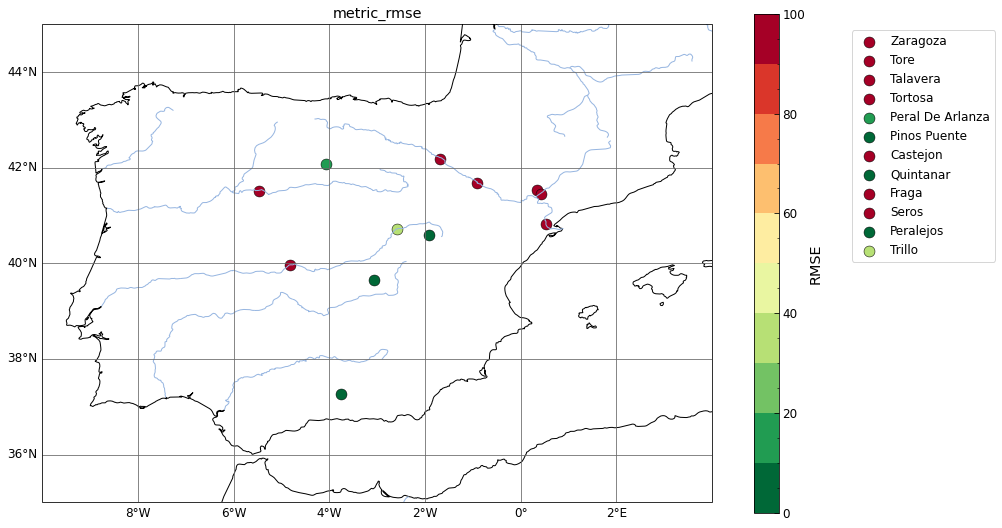

In [140]:
sim=sim_noirr
metric_to_use = metric_rmse
display_metric_map(sim, obs, proper_stations_dict, metric_to_use, metric_min=0, metric_max=100, legend=True)

In [141]:
sim=sim_irr
metric_to_use = 
display_metric_map(sim, obs, proper_stations_dict, metric_to_use, metric_min=-100, metric_max=100, legend=True)

SyntaxError: invalid syntax (1190837964.py, line 2)

In [ ]:
sim=sim_noirr
metric_list=[metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
# metric_list=[metric_bias]
for metric_to_use in metric_list:
    display_metric_map(sim, obs, proper_stations_dict, metric_to_use, legend=False)

In [ ]:
sim=sim_irr
metric_list=[metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
for metric_to_use in metric_list:
    display_metric_map(sim, obs, proper_stations_dict, metric_to_use, legend=False)

In [ ]:
sim1=sim_irr
sim2=sim_noirr
metric_list=[metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
metric_list=[metric_rmse]
vmin=-25
vmax= 25
for metric_to_use in metric_list:
    display_metric_diff_map(sim1, sim2, obs, proper_stations_dict, metric_to_use,  metric_min=vmin, metric_max=vmax,legend=False)